
****************************************************************** 将es上的数据下载到csv

es2csv -u localhost:9700 -i crawler-result_amazon_seller_product_review-2018.08.24 -q '*' -o /Users/admin/Desktop/2018-8-24.csv







『 ES 』


约定：
	【 $ 】，表示在命令行输入。


1）开启 es 服务器
* $ elasticsearch 
* $ elasticsearch -E cluster.name=amazon -E node.name=amazon_spider_v1.0

2）检查 es 服务器是否运行
（可以是在别的电脑上，也可以是在本机。若在别的电脑上，那么该电脑上的es服务器应设置为外网可以访问。）

* $ curl http://localhost:9200
* 浏览器中登录   http://localhost:9200   也可以看到相同的结果。

3）创建
* 创建索引
    * $ curl -X PUT http://localhost:9200/properties   

4）删除
* 删除索引
    * $ curl -X DELETE http://localhost:9200/properties           # 前提得有 properties 这个索引才可以删除，否则会报错。

* 删除 id 为 1 的文档
    * $ curl -X DELETE http://localhost:9200/amazon/product/1

5）查询
（注意：
	?pretty=true  <—>  以更美观的json格式打印出来；
	这些查询 url 均可以直接在浏览器上访问，结果一样。
   ）

* 查看当前节点（cluster，集群）的所有索引（Index）。
    * $ curl -X GET http://localhost:9200/_cat/indices?v

* 查每个索引中所包含的 Type（相当于数据库中的表）。
    * $ curl localhost:9200/_mapping?pretty=true                             

* 查 amazon 索引下的所有类型。
    * $ curl http://localhost:9200/amazon/_mapping/?pretty=true




* 查当前节点（cluster）状态。
    * $ curl http://localhost:9200/?pretty=true 

* 查当前节点（cluster），某索引（index）的状态。
    * $ curl http://localhost:9200/properties/?pretty=true 

* 查当前节点（cluster），某索引（index），某类型（type）的前32条文档（默认为10条）。
    * $ curl http://localhost:9200/properties/property/_search/?pretty=true&size=32
                                                             索引         类型
                                                           数据库         表

* 查当前节点（cluster），某索引（index），某类型（type），文档 id 为 14 的文档。
    * $ curl http://localhost:9200/amazon/product/14?pretty=true                    

		【 ”found" : true 】，表示该文档（字段）查询成功；  如果 Id 不正确，就查不到数据，found字段就是false。

* 关键字查询
	通过添加 q= 参数到 url 中的，我们可以在  全域  或  特定字段  搜索关键词。相关性最强的结果会首先显示出来。
    * $ curl http://localhost:9200/properties/property/_search?q=title:london 
                                                                                         title 字段为 london 或 含，相似



* 更复杂的查询，可以查询ES文档。
    * https://www.elastic.co/guide/en/elasticsearch/reference/current/query-dsl-query-string-query.html 






查看id 为6的文档
http://localhost:9200/amazon/product/6?pretty=true



{
* "_index": "crawler-unique_amazon_product-2018.03.16",         <——————————————————————————   _index  ----- 文档属于哪个索引
* "_type": "doc",                                                                             <——————————————————————————   _type    ----- 文档所代表的对象的类型
* "_id": "8a3b0adcade379217bd96d2e3221e195",                       <——————————————————————————   _id        ----- 文档的唯一标识符
* "_version": 1,                                                                              <——————————————————————————    _version  ----- 文档的版本，1 为初始的，2 为更新过一次，3 以此类推
* "_score": 1,                                                                                 <——————————————————————————    _score  -----  文档的匹配程度，1为最大值，即完全匹配
* "_source": {                                                                                 <——————————————————————————    _source  -----  文档的原始资料，即爬虫爬取的数据
    * "type": "unique",
    * "tags": [
        * "crawler"
    * ],
    * "spider": "amazon_product",                  <+++++++++++++++++++++++++++++++++++++++++++  爬虫数据外层包装
    * "@version": "1",
    * "data": {                                                  <+++++++++++++++++++++++++++++++++++++++++++  爬虫数据外层包装
        * "mask_code": "8a3b0adcade379217bd96d2e3221e195",
        * "if_sponsored": "no sponsored",
        * "offers_count": 2,
        * 略
        * 略
        * "pkid": "13fcfa84d8e316f10c98038280bd9e46",
        * "price": 35.66,
        * "brand_id": "000000000000000000000000"
    * },
    * "@timestamp": "2018-03-16T06:38:01.580Z",
    * "action_type": "worker_init",                   <+++++++++++++++++++++++++++++++++++++++++++  爬虫数据外层包装
    * "task_id": "crawler_20180316"               <+++++++++++++++++++++++++++++++++++++++++++  爬虫数据外层包装
* }
}









***************************** es服务器 浏览器 存储格式 *********************
http://localhost:9200/amazon/product/_search?pretty=true&size=32
********************************************************************
{
  "took" : 6,                took字段表示该操作的耗时（单位为毫秒）
  "timed_out" : false,       timed_out字段表示是否超时
  "_shards" : {
    "total" : 5,
    "successful" : 5,
    "skipped" : 0,
    "failed" : 0
  },
  "hits" : {                 hits字段表示命中的记录，里面子字段的含义如下
    "total" : 24,               返回记录数，本例是24条。
    "max_score" : 1.0,          最高的匹配程度，本例是1.0, 返回的记录中，每条记录都有一个_score字段，表示匹配的程序，默认是按照这个字段降序排列。
    "hits" : [                  返回的记录组成的数组
      {                      文档元数据：_index ，_type ，_id  和其他元数据
        "_index" : "amazon",               _index  ----- 文档在哪个索引
        "_type" : "product",               _type   ----- 文档所代表的对象的类型
        "_id" : "14",                      _id     ----- 文档的唯一标识符，创建的时候若没设定，会自动创建一个；该ID是一个字符串，也可以是数字。
        "_score" : 1.0,                    _score  ----- 匹配程度
        "_source" : {
          "description" : "Style Name:MQ505Braun, global leaders in hand blenders, offers new possibilities in creative cooking with the Multiquick 5 Hand Blender, model MQ505. Discover your new favorite cooking tool that fits comfortably in your hand. Multiple attachments give you the flexibility to add fresh twists to everything from dips and sauces to whipped cream and soups.",
          .
          .略
          .
          "pkid" : "8bc0e84e48e21b92721d4ad7d4fc645f",
          "if_sponsored" : "no sponsored",
          "price" : "$55.99"
        }
      },
      {
        "_index" : "amazon",
        "_type" : "product",
        "_id" : "M0V34GEB1MWxTjnqXmlt",
        "_score" : 1.0,
        "_source" : {
          "description" : "",
          "product_information" : {
            "Item model number" : "HA0694FBA ",
            "ASIN" : "B076GW89V9 ",
            "Shipping Weight" : "2.2 pounds ( View shipping rates and policies ) ",
            .
            .
            .








6）常见报错

6.1）
原因：另一个实例正在运行
参考： https://stackoverflow.com/questions/28932178/elasticsearch-failed-to-obtain-node-lock-is-the-following-location-writable 
解决：           	        
* $ ps aux | grep 'elastic'
* $ kill -9 <PID_OF_RUNNING_ELASTIC>


￼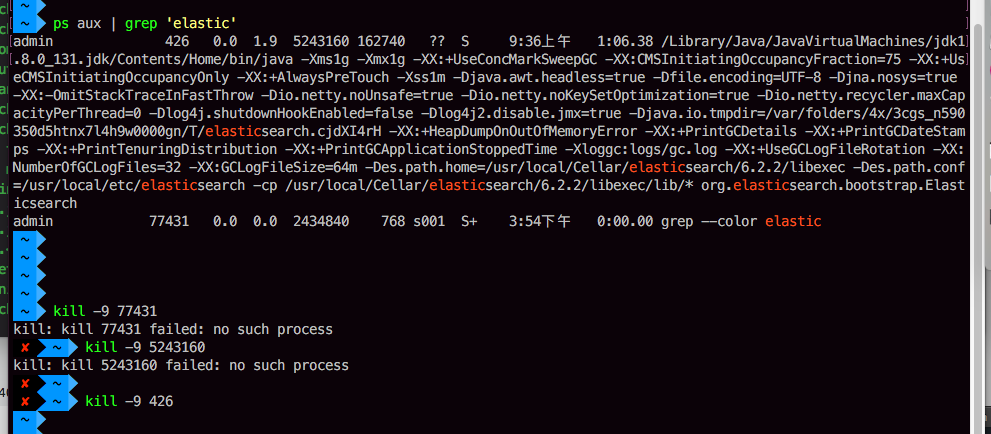
￼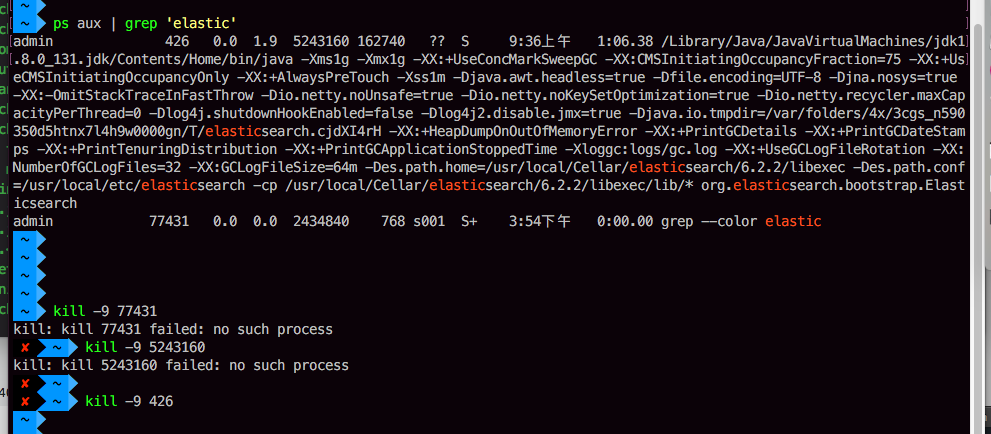